# Predicting Stock Prices in Python
Predicting stock prices is a challenging task due to the complexity and volatility of the stock market. Various methods can be used for this purpose, ranging from statistical techniques to machine learning models. One popular and effective method is using **Long Short-Term Memory (LSTM)** networks, a type of recurrent neural network (RNN) specifically designed to capture temporal dependencies in sequential data.

## Methods for Predicting Stock Prices
1. `Statistical Methods`:

    - Moving Averages: Simple and exponential moving averages to smooth out price data and identify trends.
    - ARIMA Models: AutoRegressive Integrated Moving Average models for time series forecasting.

2. `Machine Learning Models`:

    - Linear Regression: A basic approach to model the relationship between time and stock prices.
    - Random Forest: An ensemble method that uses multiple decision trees to improve predictive accuracy.

3. `Deep Learning Models`:

    - LSTM Networks: Specialized RNNs that can learn long-term dependencies in sequential data.
  
## Long Short-Term Memory (LSTM)
LSTM networks are a type of RNN designed to overcome the limitations of traditional RNNs, which struggle with learning long-term dependencies due to the vanishing gradient problem. LSTMs address this by using a memory cell that can maintain information over long periods. This makes LSTMs particularly well-suited for time series prediction tasks, such as stock price forecasting.

Key Features of LSTM:

- Cell State: The memory component of the LSTM that carries information across time steps.
Gates:
- Forget Gate: Decides what information to discard from the cell state.
- Input Gate: Determines which new information to add to the cell state.
- Output Gate: Controls the output based on the cell state.


![Alternative_text](./LSTM.png)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_ta as ta
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy as dc

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
df = pd.read_excel("RawData21.xlsx",
                   sheet_name="predict")

In [4]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.sort_values(by='Time', inplace=True)

In [8]:
df

,Open,High,Low,Target,Change,%Chg,Volume
Time,,,,,,,
2000-01-03,29.47,29.470,28.690,28.84,-0.75,-0.0253,82800
2000-01-04,28.47,28.590,27.940,28.03,-0.81,-0.0281,146900
2000-01-05,28.00,28.130,27.720,27.91,-0.12,-0.0043,129200
2000-01-06,27.91,28.380,27.810,28.28,0.37,0.0133,54000
2000-01-07,28.63,29.380,28.630,29.38,1.10,0.0389,32900
...,...,...,...,...,...,...,...
2024-05-09,124.59,125.590,124.450,125.59,1.24,0.0100,6681900
2024-05-10,126.14,126.220,125.440,125.68,0.09,0.0007,6038500
2024-05-13,125.96,126.100,125.080,125.15,-0.53,-0.0042,5946800


<Axes: ylabel='Price'>

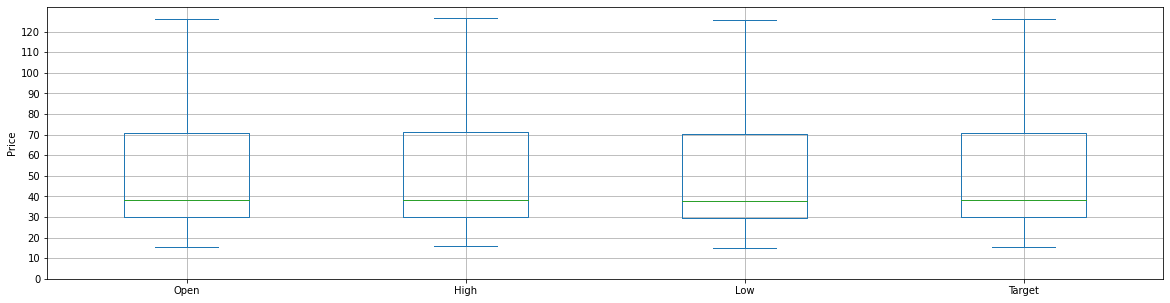

In [5]:
df[['Open', 'High', 'Low', 'Target']].plot(kind='box', 
                                          grid=True,
                                          ylabel='Price',
                                          figsize=(20, 5),
                                          yticks=np.arange(0, int(df[['Open', 'High', 'Low', 'Target']].max().max().round()),
                                                           step=10))

## Explanation of Indicators

The code snippet calculates several technical indicators commonly used in financial analysis to evaluate the behavior of stock prices. Here’s a detailed explanation of each indicator:

1. **Relative Strength Index (RSI):**
   
   ```python
   df['RSI'] = ta.rsi(df.Target, length=15)
   ```
- RSI (Relative Strength Index): This indicator measures the speed and change of price movements. It is used to identify overbought or oversold conditions in a market.
- Formula: $$ \text{RSI} = 100 - \left( \frac{100}{1 + \text{RS}} \right) $$, where RS (Relative Strength) is the average of x days' up closes divided by the average of x days' down closes.
- Parameters:
    - df.Target: The column in the DataFrame that contains the target prices.
    - length=15: The period over which the RSI is calculated, typically 14 or 15 days.
- Interpretation:
    - RSI values range from 0 to 100.
    - An RSI above 70 is generally considered overbought, indicating a potential sell signal.
    - An RSI below 30 is generally considered oversold, indicating a potential buy signal.
 
2. **Exponential Moving Average (EMA) - Fast:**
   
    ```python
    df['EMAF'] = ta.ema(df.Target, length=20)
    ```
- EMA (Exponential Moving Average): This is a type of moving average that places a greater weight and significance on the most recent data points.
- Fast EMA: Refers to an EMA with a shorter time period, which makes it more sensitive to recent price changes.
Parameters:
- df.Target: The column in the DataFrame that contains the target prices.
length=20: The period over which the EMA is calculated, typically shorter to capture more immediate trends.
- Interpretation:
    - The Fast EMA reacts quickly to price changes, helping to identify short-term trends.

3. **Exponential Moving Average (EMA) - Medium:**
   
   ``` python
   df['EMAM'] = ta.ema(df.Target, lenght=100)
   ```
- Medium EMA: Refers to an EMA with a medium time period, which balances sensitivity to recent price changes and smoothness of the average.
Parameters:
- df.Target: The column in the DataFrame that contains the target prices.
- length=100: The period over which the EMA is calculated. (Note: There's a typo in the code, lenght should be corrected to length.)
- Interpretation:
    - The Medium EMA provides a balance between the Fast and Slow EMAs, capturing mid-term trends.
 
4. **Exponential Moving Average (EMA) - Slow:**
   
    ```python
    df['EMAS'] = ta.ema(df.Target, lenght=150)
    ```
- Slow EMA: Refers to an EMA with a longer time period, which makes it less sensitive to recent price changes and better for capturing long-term trends.
- Parameters:
- df.Target: The column in the DataFrame that contains the target prices.
- length=150: The period over which the EMA is calculated. (Note: There's a typo in the code, lenght should be corrected to length.)
- Interpretation:
    - The Slow EMA smooths out price data over a longer period, highlighting long-term trends and reducing the impact of short-term volatility.


In [6]:
#Indicators
df['RSI'] = ta.rsi(df.Target, length=15)
df['EMAF'] = ta.ema(df.Target, length=20)
df['EMAM'] = ta.ema(df.Target, lenght=100)
df['EMAS'] = ta.ema(df.Target, lenght=150)

The code snippet below performs two main operations on the DataFrame `df` to create new columns: `TargetClass` and `NextTarget`.

1. **Creating the `TargetClass` Column:**
   
   ```python
   df['TargetClass'] = df['Change'].apply(lambda x: 1 if x > 0 else 0)
   ```
- This line creates a new column called TargetClass in the DataFrame df.
- It uses the apply method to apply a lambda function to each element in the Change column.
- **Lambda Function:**
    - lambda x: 1 if x > 0 else 0: This anonymous function checks if the value x (an element from the Change column) is greater than 0.
    - If x is greater than 0, the function returns 1 (indicating a positive change).
    - If x is less than or equal to 0, the function returns 0 (indicating a non-positive change).
- **Purpose:** The TargetClass column categorizes the stock price change into binary classes: 1 for a positive change and 0 for a non-positive change.

2. **Creating the `NextTarget` Column:**
   
    ```python
    df['NextTarget'] = df['Target'].shift(-1)
    ```
- This line creates a new column called NextTarget in the DataFrame df.
- It uses the shift method on the Target column with an argument of -1.
- **Shift Method:**
    - shift(-1): This method shifts the values in the Target column up by one position.
    - The last value in the Target column will be shifted out, resulting in a NaN at the last position.
- **Purpose:** The NextTarget column contains the target prices for the next time step. This is often used in time series forecasting to predict the next value based on current and past values.

In [7]:
df['TargetClass'] = df['Change'].apply(lambda x: 1 if x > 0 else 0)
df['NextTarget'] = df['Target'].shift(-1)

df.dropna(inplace=True)
df.drop(['%Chg', 'Volume'], axis=1, inplace=True)

In [8]:
# Relocate the 'Change' column to the 8th index
col = df.pop('Change')
df.insert(8, 'Change', col)

In [13]:
df

,Open,High,Low,Target,RSI,EMAF,EMAM,EMAS,Change,TargetClass,NextTarget
Time,,,,,,,,,,,
2000-01-31,26.84,27.280,26.840,27.19,33.893825,28.345000,27.754698,27.754698,0.19,1,27.00
2000-02-01,27.16,27.160,26.910,27.00,32.147094,28.216905,27.617480,27.617480,-0.19,0,27.03
2000-02-02,27.22,27.220,26.880,27.03,32.733549,28.103866,27.510666,27.510666,0.03,1,27.00
2000-02-03,27.13,27.160,26.750,27.00,32.433205,27.998736,27.417817,27.417817,-0.03,0,27.09
2000-02-04,27.28,27.280,27.060,27.09,34.368829,27.912190,27.358214,27.358214,0.09,1,26.63
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08,123.61,124.515,123.590,124.35,57.890132,122.926544,123.149268,123.149268,0.00,0,125.59
2024-05-09,124.59,125.590,124.450,125.59,62.536821,123.180206,123.593037,123.593037,1.24,1,125.68
2024-05-10,126.14,126.220,125.440,125.68,62.855561,123.418282,123.972485,123.972485,0.09,1,125.15


In [9]:
layout = go.Layout(
    width=1200, 
    height=600,
    title='Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        tickfont=dict(
            family='Courier New, monospace',
            size=14,  
            color='black'  
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        tickfont=dict(
            family='Courier New, monospace',
            size=14, 
            color='black'  
        )
    )
)

stockmarket_data = [{'x':df.index, 'y':df['Target']}]
plot = go.Figure(data=stockmarket_data, layout=layout)

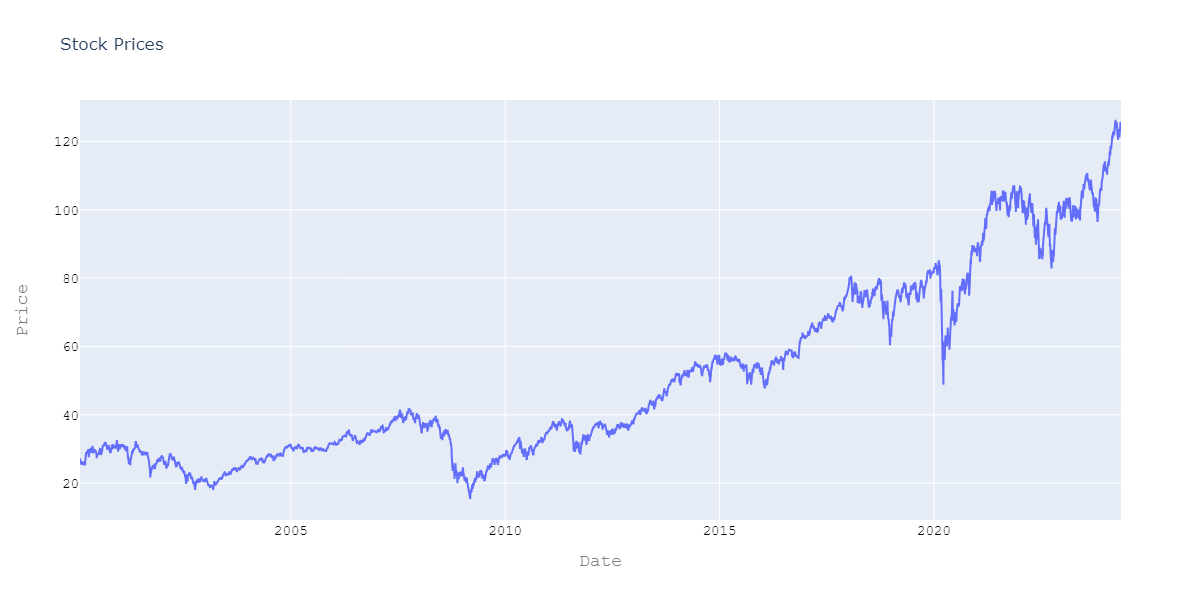

In [10]:
iplot(plot)

## The Min-Max Scaling Technique

The formula for Min-Max scaling is quite straightforward. Given a feature $x$, the formula to scale it to a range between $a$ and $b$ is:

$$
x_{\text{scaled}} = \frac{{x - \text{min}(x)}}{{\text{max}(x) - \text{min}(x)}} \times (b - a) + a
$$

Where:

- $x_{\text{scaled}}$ is the scaled value of $x$,
- $\text{min}(x)$ is the minimum value of $x$,
- $\text{max}(x)$ is the maximum value of $x$,
- $a$ and $b$ are the lower and upper bounds of the desired range.

This formula ensures that the scaled values lie within the specified range $[a, b]$, preserving the relative relationships between the original values.

1. **Creating the MinMaxScaler Object:**
   ```python
   sc = MinMaxScaler(feature_range=(0,1))
   ```
   - This line creates an instance of the `MinMaxScaler` class from the scikit-learn library.
   - **Parameters**:
     - `feature_range=(0,1)`: Specifies the range to which the features will be scaled. In this case, it scales the features to a range between 0 and 1.
   - **Purpose**: Min-Max scaling transforms the features so that they are in a specified range, which is often helpful for machine learning algorithms that are sensitive to the scale of the input features. It ensures that all features have the same scale, preventing some features from dominating others due to their larger magnitude.

2. **Scaling the Data:**
   ```python
   scaled_data = sc.fit_transform(df)
   ```
   - This line applies the Min-Max scaling transformation to the DataFrame `df`.
   - The `fit_transform` method fits the scaler to the data (`df`) and then transforms it.
   - **Purpose**: Scaling the data ensures that all features have similar ranges, making it easier for machine learning algorithms to learn the underlying patterns in the data. Min-Max scaling specifically preserves the shape of the original distribution while scaling the values to a specified range, in this case, between 0 and 1.

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(df)

In [19]:
print(scaled_data)

[[0.10265679 0.10348259 0.10580575 ... 0.55071375 1.         0.10524412]
 [0.10554853 0.10239711 0.10643878 ... 0.52216379 0.         0.10551537]
 [0.10609073 0.10293985 0.10616748 ... 0.53869271 1.         0.10524412]
 ...
 [1.         0.99846223 0.9974679  ... 0.5432006  1.         0.99267631]
 [0.9983734  0.99737675 0.99421233 ... 0.49661908 0.         0.99240506]
 [0.99322248 0.99294437 0.99208718 ... 0.53418482 0.         0.99981917]]


1. **Define Window Size:**
   ```python
   backcandles = 10
   ```
   - This line sets the window size or the number of previous time steps to consider for each prediction. In this case, `backcandles` is set to `10`, meaning the model will use the previous 10 time steps to predict the next time step.

2. **Prepare Input Features (X):**
   ```python
   X = np.array([scaled_data[i-backcandles:i,:8].copy() 
                 for i in range(backcandles, len(scaled_data))])
   ```
   - This line creates the input features matrix `X`.
   - It uses a list comprehension to iterate over the range from `backcandles` to the length of `scaled_data`, excluding the first `backcandles` time steps.
   - For each iteration, it slices the `scaled_data` array to extract the previous `backcandles` time steps for all features except the last one (which is usually the target variable).
   - The `.copy()` method is used to create a copy of the sliced array to avoid modifying the original data.
   - Finally, it converts the list of arrays into a 3D NumPy array.

3. **Prepare Target Variable (y):**
   ```python
   yi = np.array(scaled_data[backcandles:, -1])
   y = np.reshape(yi, (len(yi), 1))
   ```
   - This line prepares the target variable `y`.
   - It slices the last column (usually the target variable) of `scaled_data` starting from the index `backcandles` to match the input features.
   - Then, it reshapes the array to ensure that `y` has a shape of `(number of samples, 1)`.
   
In conclusion:
- `backcandles` defines the window size for the time series data.
- `X` is the input features matrix containing the previous `backcandles` time steps for each sample.
- `y` is the target variable containing the corresponding target values for each sample, typically representing the next time step's value.

In [22]:
backcandles = 10
X = np.array([scaled_data[i-backcandles:i,:8].copy() for i in range(backcandles, len(scaled_data))])

yi = np.array(scaled_data[backcandles:, -1])
y = np.reshape(yi,(len(yi),1))

print(X.shape)
print(y.shape)

(6101, 10, 8)
(6101, 1)


In [70]:
# split data into train test sets
splitlimit = int(len(X) * 0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")
print(f"y_train:{y_train}")

X_train Shape: (4880, 10, 8)
X_test Shape: (1221, 10, 8)
y_train Shape: (4880, 1)
y_test Shape: (1221, 1)
y_train:[[0.09900542]
 [0.09846293]
 [0.09963834]
 ...
 [0.55614828]
 [0.55461121]
 [0.55298373]]


## LSTM (Long Short-Term Memory) Model for Time Series Forecasting Using PyTorch

The code below demonstrates how to implement and train an LSTM model for time series forecasting using PyTorch, including data preparation, model definition, training loop, and evaluation.

1. **Define LSTM Model:**
   - An LSTM model is defined using the `LSTMModel` class, which inherits from `nn.Module`.
   - The model consists of an LSTM layer followed by a linear layer (fully connected) for output.
   - The `forward` method specifies how input data flows through the model.

2. **Hyperparameters:**
   - `input_size`: Number of features in the input data.
   - `hidden_size`: Number of units in the hidden LSTM layer.
   - `output_size`: Number of output units (typically 1 for regression tasks).
   - `learning_rate`: Learning rate for the Adam optimizer.
   - `batch_size`: Number of samples per batch during training.
   - `epochs`: Number of epochs for training.
   - `validation_split`: Percentage of training data to use for validation.

3. **Prepare Data:**
   - Input and target data (`X_train`, `y_train`, `X_test`, `y_test`) are converted to PyTorch tensors.
   - A PyTorch `TensorDataset` is created from the training data, and it is split into training and validation sets using `random_split`.
   - PyTorch `DataLoader` objects are created for both training and validation sets to iterate over batches during training.

4. **Initialize Model, Loss Function, and Optimizer:**
   - An instance of the `LSTMModel` is created.
   - Mean Squared Error (MSE) loss function (`nn.MSELoss`) and Adam optimizer (`optim.Adam`) are defined.

5. **Training Loop:**
   - The model is trained for the specified number of epochs.
   - Inside the loop, training data is iterated over batches using the training data loader.
   - For each batch, the optimizer is zeroed, forward pass is performed, loss is calculated, gradients are backpropagated, and optimizer step is taken.
   - Training loss is calculated and printed.
   - Validation is performed similarly using the validation data loader, and validation loss is printed.

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Set random seed for reproducibility
torch.manual_seed(10)

# Define the model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dense = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        dense_out = self.dense(lstm_out[:, -1, :])  # Use the output of the last LSTM cell
        return dense_out

# Hyperparameters
input_size = 8  # Number of features
hidden_size = 150
output_size = 1
learning_rate = 0.001
batch_size = 15
epochs = 30
validation_split = 0.1

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

# Create Dataset and DataLoader
dataset = TensorDataset(X_train, y_train)
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')

Epoch [1/30], Loss: 0.0018, Val Loss: 0.0001
Epoch [2/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [3/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [4/30], Loss: 0.0001, Val Loss: 0.0001
Epoch [5/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [6/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [7/30], Loss: 0.0001, Val Loss: 0.0001
Epoch [8/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [9/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [10/30], Loss: 0.0001, Val Loss: 0.0001
Epoch [11/30], Loss: 0.0001, Val Loss: 0.0001
Epoch [12/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [13/30], Loss: 0.0001, Val Loss: 0.0001
Epoch [14/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [15/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [16/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [17/30], Loss: 0.0001, Val Loss: 0.0000
Epoch [18/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [19/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [20/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [21/30], Loss: 0.0000, Val Loss: 0.0000
Epoch [22/30], Loss: 0.0001, Val Loss: 0.00

In [72]:
# Rescaling the y_train
dummies = np.zeros((X_train.shape[0], backcandles + 1))
dummies[:, 0] = y_train.flatten()
dummies = sc.inverse_transform(dummies)

rescaled_y_train = dc(dummies[:, 0])
rescaled_y_train

array([26.43594016, 26.37590803, 26.5059782 , ..., 77.02336984,
       76.85327606, 76.67317638])

In [73]:
# Achieving train predictions and rescaling them
train_predictions = model(X_train).detach().cpu().numpy().flatten()

dummies = np.zeros((X_train.shape[0], backcandles + 1))
dummies[:, 0] = train_predictions
dummies = sc.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([25.47068781, 25.90027964, 26.40299142, ..., 77.56889281,
       77.08741554, 76.54130555])

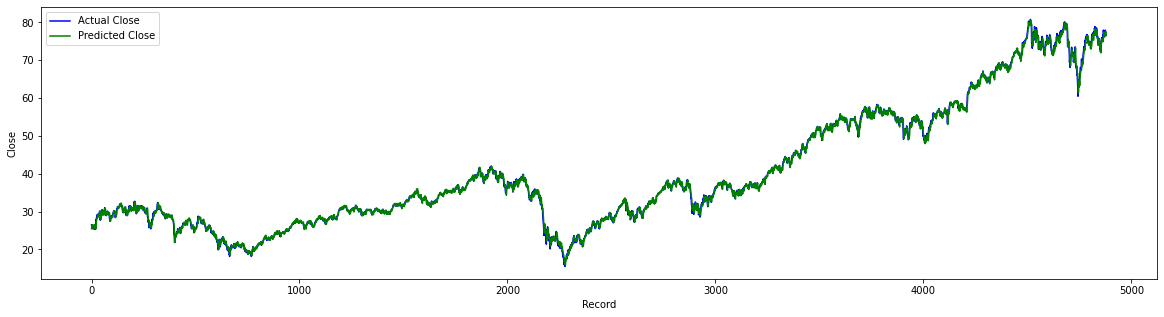

In [74]:
plt.figure(figsize=(20,5))
plt.plot(rescaled_y_train, label='Actual Close', color='blue')
plt.plot(train_predictions, label='Predicted Close', color='green')
plt.xlabel('Record')
plt.ylabel('Close')
plt.legend()
plt.show()

In [75]:
# Achieving test predictions and rescaling them
test_predictions = model(X_test).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], backcandles + 1))
dummies[:, 0] = test_predictions
dummies = sc.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 76.32619509,  76.38829502,  76.77478545, ..., 122.02519877,
       122.46557729, 122.02217128])

In [76]:
# Rescaling the y_test values
dummies = np.zeros((X_test.shape[0], backcandles + 1))
dummies[:, 0] = y_test.flatten()
dummies = sc.inverse_transform(dummies)

rescaled_y_test = dc(dummies[:, 0])
rescaled_y_test

array([ 77.19346362,  78.54419476,  78.22401901, ..., 125.32956132,
       125.2995436 , 126.11998819])

In [77]:
# Print a few predictions and their corresponding true values
for i in range(10):
    print(f'Prediction: {test_predictions[i]}, True Value: {rescaled_y_test[i]}')

Prediction: 76.32619509339332, True Value: 77.19346362113953
Prediction: 76.38829502105713, True Value: 78.54419476151466
Prediction: 76.77478544712066, True Value: 78.22401901125909
Prediction: 78.04907728195191, True Value: 78.72428784966469
Prediction: 77.94095810890198, True Value: 77.04338165044786
Prediction: 78.31134146928788, True Value: 77.18345771670342
Prediction: 76.75123166680336, True Value: 77.60368591547012
Prediction: 76.66083554267884, True Value: 77.6637147462368
Prediction: 77.29783635139465, True Value: 78.6442472100258
Prediction: 77.35845221281052, True Value: 78.9844347691536


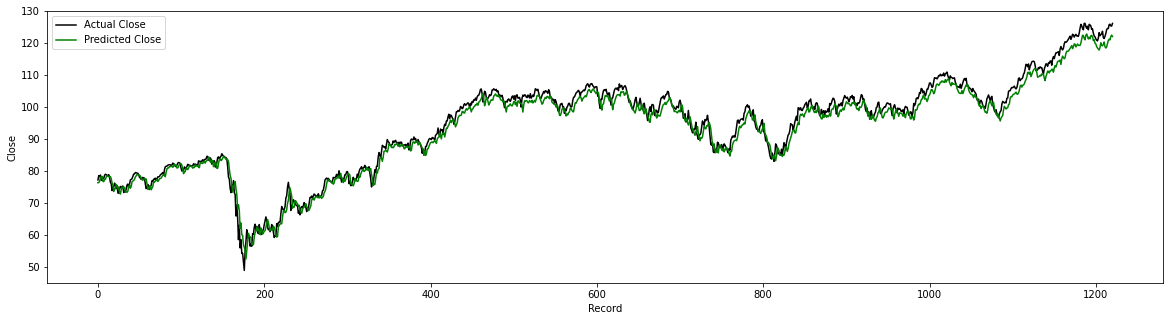

In [78]:
plt.figure(figsize=(20,5))
plt.plot(rescaled_y_test, color='black', label='Actual Close')
plt.plot(test_predictions, color='green', label='Predicted Close')
plt.xlabel('Record')
plt.ylabel('Close')
plt.legend()
plt.show()

## Accuracy Metrics

### Mean Absolute Error (MAE):
Mean Absolute Error (MAE) measures the average absolute difference between the predicted values and the actual values. It gives an idea of the magnitude of the error but doesn't indicate the direction of the error.

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}, i} - y_{\text{pred}, i}|$$


In [79]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(rescaled_y_test, test_predictions)
mae

1.8610797664603675

### Mean Squared Error (MSE):
Mean Squared Error (MSE) measures the average of the squares of the errors between the predicted values and the actual values. It penalizes larger errors more heavily than smaller ones.

 $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2$$



In [80]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(rescaled_y_test, test_predictions)
mse

5.197130461216424

### Root Mean Squared Error (RMSE):
Root Mean Squared Error (RMSE) is the square root of the MSE. It's interpretable in the same units as the target variable and provides a measure of the spread of the errors.

$$ \text{RMSE} = \sqrt{\text{MSE}} $$



In [81]:
# Calculate RMSE
rmse = np.sqrt(mse)
rmse

2.279721575371963

### R-squared (R2) Score:
R-squared (R2) Score measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). It ranges from 0 to 1, with higher values indicating a better fit of the model.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2}{\sum_{i=1}^{n} (y_{\text{true}, i} - \bar{y}_{\text{true}})^2} $$



In [82]:
from sklearn.metrics import r2_score

# Calculate R2 Score
r2 = r2_score(rescaled_y_test, test_predictions)
r2

0.9759831618091364

These accuracy metrics provide valuable insights into the performance of our LSTM model for stock price prediction:

1. **Mean Absolute Error (MAE)**: An MAE of 1.86 suggests that, on average, the model's predictions are off by approximately $1.86.

2. **Mean Squared Error (MSE)**: An MSE of 5.19 suggests that the squared differences between predicted and actual values are, on average, 5.19.

3. **Root Mean Squared Error (RMSE)**: An RMSE of 2.2 indicates that, on average, the predictions are off by approximately $2.20.

4. **R-squared (R2) score**: A high R2 score of 0.97 suggests that the model explains 97% of the variance in the stock prices.